<a href="https://colab.research.google.com/github/RenanYMartins/ADD-Trabalho2/blob/main/Mercado_Imobili%C3%A1rio_de_Nova_York_Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa II - Classificação e Regressão
# Base Mercado Imobiliário de Nova York

## Setup Inicial

Importando bibliotecas e conectando à base de dados.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix,
    mean_squared_error
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Trabalho I/data/07_mercado_imobiliário_ny.csv')

## Visão Inicial dos Dados

In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Vemos que os dados representam imóveis à venda disponíveis em Nova Iorque, com as seguintes propriedades:

- `BROKERTITLE`: Título do corretor.
- `TYPE`: Tipo do imóvel.
- `PRICE`: Preço do imóvel.
- `BEDS`: Número de quartos.
- `BATH`: Número de banheiros.
- `PROPERTYSQFT`: Área em $\mathrm{m}^2$.
- `ADDRESS`: Endereço completo.
- `STATE`: Estado (NY).
- `MAIN_ADDRESS`: Endereço principal.
- `ADMINISTRATIVE_AREA_LEVEL_2`: Área administrativa secundária.
- `LOCALITY`: Localidade.
- `SUBLOCALITY`: Sublocalidade.
- `STREET_NAME`: Nome da rua.
- `LONG_NAME`: Nome completo da localização.
- `FORMATTED_ADDRESS`: Endereço formatado.
- `LATITUDE`: Latitude geográfica.
- `LONGITUDE`: Longitude geográfica.

In [5]:
df.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})

,Variável,Quantidade de Nulos
0,BROKERTITLE,0
1,TYPE,0
2,PRICE,0
3,BEDS,0
4,BATH,0
5,PROPERTYSQFT,0
6,ADDRESS,0
7,STATE,0
8,MAIN_ADDRESS,0
9,ADMINISTRATIVE_AREA_LEVEL_2,0


Vamos remover os dados duplicados, mantendo apenas uma instância de cada um deles.

In [6]:
df_filtered = df.drop_duplicates()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

### Limpeza outlier com valor de U$2 bilhões.

In [7]:
df_filtered = df_filtered[df_filtered['PRICE'] != 2147483647]

# Classificação e Regressão
### Como já foi realizado uma análise prévia da base anteriormente, agora analisaremos a base com alguns algoritmos de classificação e regressão.

### Preparando os dados

In [12]:
X = df_filtered['PRICE']
y = df_filtered[['BEDS', 'BATH', 'PROPERTYSQFT']]

### Separação de dados de treino e teste


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão Linear
### Simples

In [13]:
X = df_filtered[['PROPERTYSQFT']]
y = df_filtered['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

print("🔹 Regressão Linear Simples")
print(f"R²: {r2_score(y_test, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_simple)):.2f}")

🔹 Regressão Linear Simples
R²: 0.2201
RMSE: 3476927.84


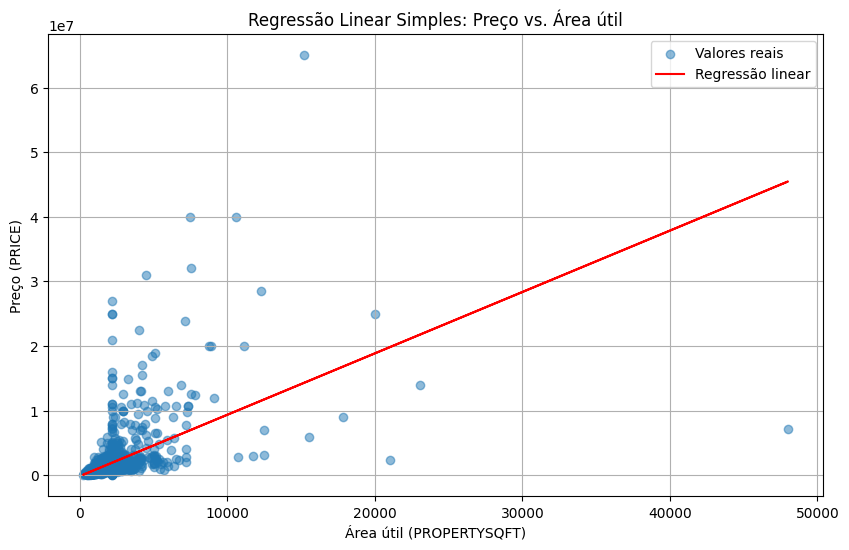

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Valores reais')
plt.plot(X_test, y_pred_simple, color='red', label='Regressão linear')
plt.title("Regressão Linear Simples: Preço vs. Área útil")
plt.xlabel("Área útil (PROPERTYSQFT)")
plt.ylabel("Preço (PRICE)")
plt.legend()
plt.grid(True)
plt.show()

## Regressão Linear
### Múltipla

In [ ]:
cols = ['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'COUNTY']
df_rlm = df_filtered[cols].dropna()

# Gerar variáveis dummy para COUNTY
X = pd.get_dummies(df_rlm.drop(columns='PRICE'), drop_first=True, dtype=float)
y = df_rlm['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

print("🔹 Regressão Linear Múltipla com COUNTY")
print(f"R²: {r2_score(y_test, y_pred_multi):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi)):.2f}")

🔹 Regressão Linear Múltipla com COUNTY
R²: 0.3282
RMSE: 3227099.79


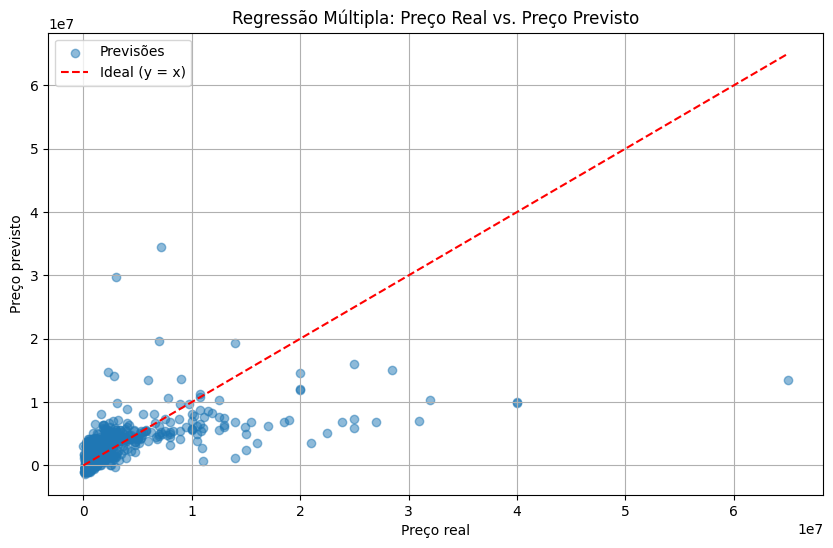

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')
plt.title("Regressão Múltipla: Preço Real vs. Preço Previsto")
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.legend()
plt.grid(True)
plt.show()

### Árvore de Regressão